# Kalp Krizi Riski Geçirme Olasılığı- Keras

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
h=GradientBoostingClassifier()
g=GaussianNB()
b=BernoulliNB()




age : yaş
sex : cinsiyet

exng: egzersize bağlı anjiya

caa: büyük damar sayısı
    
cp :göğüs ağrısı tipi

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
    
trtbps : dinlenme kan basıncı

chol : kolestrol

fbs : açlık kan şekeri

restecg : istirahat halinde ekg sonuçları
    
thalachh : ulaşılan maksimum kalp atış hızı

output : kalp krizi geçirme olasılığı fazla=1, kalp krizi geçirme olasılığı düşük=0

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
#abs(df.corr()['Sales'].sort_values(ascending=False))   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

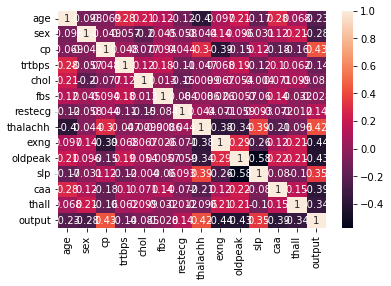

In [14]:
sns.heatmap(df.corr(),annot=True)

In [17]:
cor = df.corr()[["output"]].sort_values(by = "output", ascending = False)[1:]
cor[abs(cor["output"]) > 0.4]


#kalp krizi geçirme olasılığı, korelasyona bakıldığında aşağıdaki değerlerle daha fazla bağlantılıdır.
#Özellike göğüs ağrısı ve ulaşılan maksimum kalp atış hızı ile orantısı yüksektir.

,output
cp,0.433798
thalachh,0.421741
oldpeak,-0.430696
exng,-0.436757


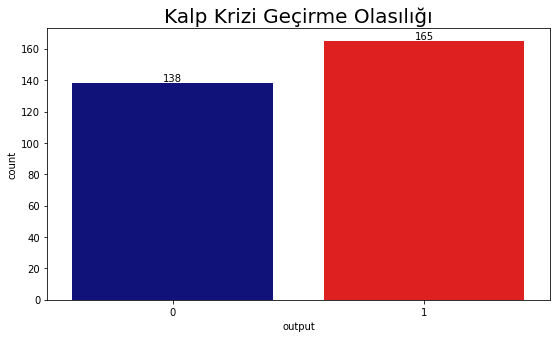

In [22]:
plt.figure(figsize = (9,5))
ax = sns.countplot(df.output, palette = ["darkblue", "red"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Kalp Krizi Geçirme Olasılığı", fontsize = 20);



#kalp krizi geçirme olasığını sıraladığımızda 138 hasta düşük riskli(0), 165 hasta yüksek riskli(1) gözükmektedir.

<AxesSubplot:xlabel='output', ylabel='count'>

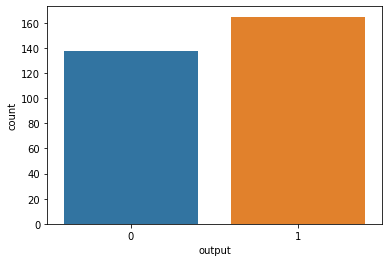

In [34]:
sns.countplot(df["output"])

<AxesSubplot:xlabel='sex', ylabel='count'>

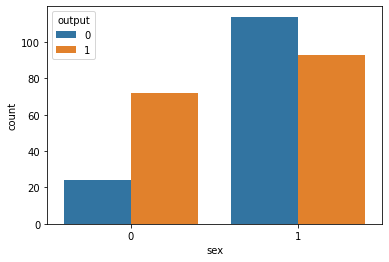

In [64]:
sns.countplot(df['sex'],hue=df['output'])


#sex= 0: erkek, 1: kadın
#kadınların kalp krizi geçirme olasılığı daha yüksek

<AxesSubplot:xlabel='cp', ylabel='count'>

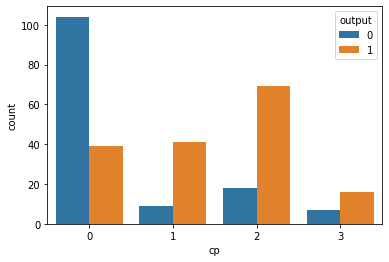

In [65]:
sns.countplot(df['cp'],hue=df['output'])

In [30]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

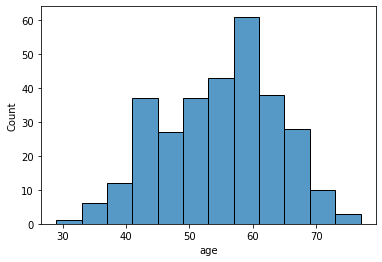

In [66]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

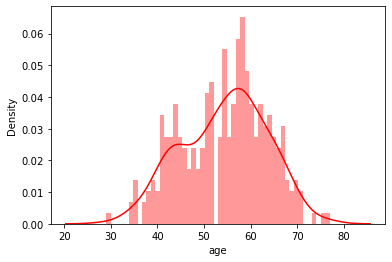

In [32]:
sns.distplot(df["age"], bins=50, color='red')         #yaş dağılımına göre 50-60 yaş aralığında risk en fazladır

<AxesSubplot:xlabel='age', ylabel='count'>

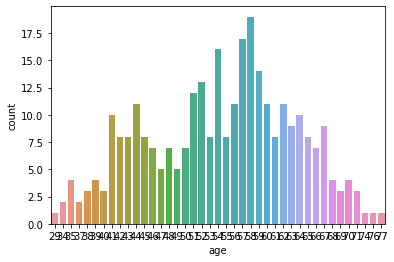

In [33]:
sns.countplot(df["age"])

In [55]:
x = df.drop("output", axis = 1)
y = df["output"]

In [56]:
x.shape, y.shape

((303, 13), (303,))

In [57]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
Ridge,0.54,0.34,0.27
LinearRegression,0.53,0.34,0.27
GradientBoostingRegressor,0.46,0.37,0.27
ExtraTreeRegressor,0.34,0.40,0.16
ElasticNet,0.28,0.42,0.39
Lasso,0.25,0.43,0.41
KNeighborsRegressor,0.18,0.45,0.35


In [58]:
#!pip install lazypredict

In [59]:
from lazypredict.Supervised import LazyClassifier

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [62]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)


models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.92,0.92,0.92,0.92,0.07
LinearSVC,0.91,0.91,0.91,0.91,0.06
RidgeClassifierCV,0.91,0.91,0.91,0.91,0.04
RidgeClassifier,0.91,0.91,0.91,0.91,0.05
LinearDiscriminantAnalysis,0.91,0.91,0.91,0.91,0.08
BernoulliNB,0.90,0.90,0.90,0.90,0.12
CalibratedClassifierCV,0.90,0.89,0.89,0.90,0.21
GaussianNB,0.88,0.88,0.88,0.88,0.02
PassiveAggressiveClassifier,0.88,0.88,0.88,0.88,0.08


# DEEP LEARNİNG İLE

In [77]:
#!pip install tensorflow

In [82]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax'),])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x,y, batch_size=32, epochs=1000, verbose=1, validation_data=(x_test,y_test))

Epoch 1/1000
10/10 [==============================] - 4s 137ms/step - loss: 9.1368 - accuracy: 0.4587 - val_loss: 1.7734 - val_accuracy: 0.5385
Epoch 2/1000
10/10 [==============================] - 1s 62ms/step - loss: 3.3828 - accuracy: 0.5083 - val_loss: 0.6857 - val_accuracy: 0.6593
Epoch 3/1000
10/10 [==============================] - 1s 68ms/step - loss: 2.4663 - accuracy: 0.5149 - val_loss: 2.5271 - val_accuracy: 0.5604
Epoch 4/1000
10/10 [==============================] - 1s 65ms/step - loss: 1.5568 - accuracy: 0.5479 - val_loss: 1.2293 - val_accuracy: 0.5604
Epoch 5/1000
10/10 [==============================] - 1s 65ms/step - loss: 1.1476 - accuracy: 0.5479 - val_loss: 0.5602 - val_accuracy: 0.6813
Epoch 6/1000
10/10 [==============================] - 1s 63ms/step - loss: 1.1108 - accuracy: 0.5611 - val_loss: 0.5682 - val_accuracy: 0.7033
Epoch 7/1000
10/10 [==============================] - 1s 70ms/step - loss: 0.8031 - accuracy: 0.5875 - val_loss: 0.6825 - val_accuracy: 0.582

Epoch 58/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.5405 - accuracy: 0.6931 - val_loss: 0.4214 - val_accuracy: 0.8352
Epoch 59/1000
10/10 [==============================] - 1s 67ms/step - loss: 0.5351 - accuracy: 0.7393 - val_loss: 0.4823 - val_accuracy: 0.7912
Epoch 60/1000
10/10 [==============================] - 1s 71ms/step - loss: 0.5390 - accuracy: 0.7492 - val_loss: 0.5332 - val_accuracy: 0.7253
Epoch 61/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.5507 - accuracy: 0.7426 - val_loss: 0.3812 - val_accuracy: 0.8571
Epoch 62/1000
10/10 [==============================] - 1s 66ms/step - loss: 0.5064 - accuracy: 0.7657 - val_loss: 0.4800 - val_accuracy: 0.7582
Epoch 63/1000
10/10 [==============================] - 1s 63ms/step - loss: 0.5847 - accuracy: 0.6766 - val_loss: 0.4987 - val_accuracy: 0.7912
Epoch 64/1000
10/10 [==============================] - 1s 61ms/step - loss: 0.5782 - accuracy: 0.6601 - val_loss: 0.4345 - val_accuracy:

Epoch 115/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.5041 - accuracy: 0.7921 - val_loss: 0.3595 - val_accuracy: 0.8901
Epoch 116/1000
10/10 [==============================] - 1s 52ms/step - loss: 0.4499 - accuracy: 0.8152 - val_loss: 0.3866 - val_accuracy: 0.8901
Epoch 117/1000
10/10 [==============================] - 1s 58ms/step - loss: 0.4827 - accuracy: 0.7690 - val_loss: 0.3068 - val_accuracy: 0.9011
Epoch 118/1000
10/10 [==============================] - 1s 56ms/step - loss: 0.4348 - accuracy: 0.8119 - val_loss: 0.3543 - val_accuracy: 0.8462
Epoch 119/1000
10/10 [==============================] - 1s 59ms/step - loss: 0.4476 - accuracy: 0.8020 - val_loss: 0.3493 - val_accuracy: 0.8791
Epoch 120/1000
10/10 [==============================] - 1s 60ms/step - loss: 0.5545 - accuracy: 0.7525 - val_loss: 0.3494 - val_accuracy: 0.8681
Epoch 121/1000
10/10 [==============================] - 1s 58ms/step - loss: 0.5519 - accuracy: 0.7459 - val_loss: 0.3797 - val_ac

10/10 [==============================] - 1s 59ms/step - loss: 0.3755 - accuracy: 0.8350 - val_loss: 0.3055 - val_accuracy: 0.8901
Epoch 228/1000
10/10 [==============================] - 1s 58ms/step - loss: 0.3994 - accuracy: 0.8185 - val_loss: 0.2965 - val_accuracy: 0.9231
Epoch 229/1000
10/10 [==============================] - 1s 63ms/step - loss: 0.3463 - accuracy: 0.8548 - val_loss: 0.3073 - val_accuracy: 0.8901
Epoch 230/1000
10/10 [==============================] - 1s 61ms/step - loss: 0.3340 - accuracy: 0.8581 - val_loss: 0.2835 - val_accuracy: 0.9011
Epoch 231/1000
10/10 [==============================] - 1s 56ms/step - loss: 0.3708 - accuracy: 0.8515 - val_loss: 0.2886 - val_accuracy: 0.9011
Epoch 232/1000
10/10 [==============================] - 1s 58ms/step - loss: 0.3553 - accuracy: 0.8350 - val_loss: 0.2887 - val_accuracy: 0.9121
Epoch 233/1000
10/10 [==============================] - 1s 58ms/step - loss: 0.3442 - accuracy: 0.8515 - val_loss: 0.2739 - val_accuracy: 0.9121


10/10 [==============================] - 1s 63ms/step - loss: 0.3233 - accuracy: 0.8713 - val_loss: 0.2673 - val_accuracy: 0.9121
Epoch 340/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.3620 - accuracy: 0.8350 - val_loss: 0.2819 - val_accuracy: 0.9011
Epoch 341/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.3744 - accuracy: 0.8383 - val_loss: 0.3513 - val_accuracy: 0.8571
Epoch 342/1000
10/10 [==============================] - 1s 57ms/step - loss: 0.3538 - accuracy: 0.8416 - val_loss: 0.2820 - val_accuracy: 0.9231
Epoch 343/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.3278 - accuracy: 0.8449 - val_loss: 0.2550 - val_accuracy: 0.9121
Epoch 344/1000
10/10 [==============================] - 1s 59ms/step - loss: 0.3154 - accuracy: 0.8548 - val_loss: 0.2681 - val_accuracy: 0.9231
Epoch 345/1000
10/10 [==============================] - 1s 59ms/step - loss: 0.3040 - accuracy: 0.8614 - val_loss: 0.2584 - val_accuracy: 0.9121


10/10 [==============================] - 1s 71ms/step - loss: 0.2636 - accuracy: 0.8845 - val_loss: 0.2726 - val_accuracy: 0.9011
Epoch 452/1000
10/10 [==============================] - 1s 52ms/step - loss: 0.2886 - accuracy: 0.8746 - val_loss: 0.2345 - val_accuracy: 0.9451
Epoch 453/1000
10/10 [==============================] - 1s 52ms/step - loss: 0.3145 - accuracy: 0.8482 - val_loss: 0.2438 - val_accuracy: 0.9231
Epoch 454/1000
10/10 [==============================] - 1s 54ms/step - loss: 0.2764 - accuracy: 0.8779 - val_loss: 0.3621 - val_accuracy: 0.8791
Epoch 455/1000
10/10 [==============================] - 1s 70ms/step - loss: 0.4303 - accuracy: 0.8251 - val_loss: 0.2740 - val_accuracy: 0.9011
Epoch 456/1000
10/10 [==============================] - 1s 66ms/step - loss: 0.3232 - accuracy: 0.8251 - val_loss: 0.2567 - val_accuracy: 0.9451
Epoch 457/1000
10/10 [==============================] - 1s 65ms/step - loss: 0.2908 - accuracy: 0.8581 - val_loss: 0.2698 - val_accuracy: 0.9231


10/10 [==============================] - 1s 61ms/step - loss: 0.2224 - accuracy: 0.9043 - val_loss: 0.1746 - val_accuracy: 0.9341
Epoch 564/1000
10/10 [==============================] - 1s 63ms/step - loss: 0.3212 - accuracy: 0.8581 - val_loss: 0.2226 - val_accuracy: 0.9231
Epoch 565/1000
10/10 [==============================] - 1s 65ms/step - loss: 0.3170 - accuracy: 0.8614 - val_loss: 0.2315 - val_accuracy: 0.9231
Epoch 566/1000
10/10 [==============================] - 1s 61ms/step - loss: 0.2916 - accuracy: 0.8548 - val_loss: 0.2405 - val_accuracy: 0.9341
Epoch 567/1000
10/10 [==============================] - 1s 67ms/step - loss: 0.2463 - accuracy: 0.8779 - val_loss: 0.1863 - val_accuracy: 0.9231
Epoch 568/1000
10/10 [==============================] - 1s 65ms/step - loss: 0.2289 - accuracy: 0.9010 - val_loss: 0.1601 - val_accuracy: 0.9560
Epoch 569/1000
10/10 [==============================] - 1s 66ms/step - loss: 0.2435 - accuracy: 0.8845 - val_loss: 0.1679 - val_accuracy: 0.9341


10/10 [==============================] - 1s 64ms/step - loss: 0.2552 - accuracy: 0.9010 - val_loss: 0.2258 - val_accuracy: 0.8901
Epoch 676/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.2419 - accuracy: 0.9010 - val_loss: 0.1678 - val_accuracy: 0.9560
Epoch 677/1000
10/10 [==============================] - 1s 70ms/step - loss: 0.2115 - accuracy: 0.8977 - val_loss: 0.1379 - val_accuracy: 0.9670
Epoch 678/1000
10/10 [==============================] - 1s 72ms/step - loss: 0.2210 - accuracy: 0.9010 - val_loss: 0.1404 - val_accuracy: 0.9670
Epoch 679/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.1777 - accuracy: 0.9208 - val_loss: 0.1135 - val_accuracy: 0.9670
Epoch 680/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.1962 - accuracy: 0.9175 - val_loss: 0.1030 - val_accuracy: 0.9780
Epoch 681/1000
10/10 [==============================] - 1s 60ms/step - loss: 0.2143 - accuracy: 0.9175 - val_loss: 0.1704 - val_accuracy: 0.9341


10/10 [==============================] - 1s 83ms/step - loss: 0.1891 - accuracy: 0.9274 - val_loss: 0.1176 - val_accuracy: 0.9670
Epoch 788/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.1678 - accuracy: 0.9175 - val_loss: 0.1212 - val_accuracy: 0.9560
Epoch 789/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.1981 - accuracy: 0.9076 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 790/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.2405 - accuracy: 0.8911 - val_loss: 0.2005 - val_accuracy: 0.9121
Epoch 791/1000
10/10 [==============================] - 1s 62ms/step - loss: 0.2787 - accuracy: 0.8614 - val_loss: 0.2082 - val_accuracy: 0.9231
Epoch 792/1000
10/10 [==============================] - 1s 64ms/step - loss: 0.2043 - accuracy: 0.9208 - val_loss: 0.1153 - val_accuracy: 0.9451
Epoch 793/1000
10/10 [==============================] - 1s 60ms/step - loss: 0.1673 - accuracy: 0.9241 - val_loss: 0.1029 - val_accuracy: 0.9560


10/10 [==============================] - 1s 84ms/step - loss: 0.1199 - accuracy: 0.9538 - val_loss: 0.0802 - val_accuracy: 0.9780
Epoch 900/1000
10/10 [==============================] - 1s 78ms/step - loss: 0.1356 - accuracy: 0.9307 - val_loss: 0.0583 - val_accuracy: 0.9890
Epoch 901/1000
10/10 [==============================] - 1s 83ms/step - loss: 0.1458 - accuracy: 0.9340 - val_loss: 0.1186 - val_accuracy: 0.9560
Epoch 902/1000
10/10 [==============================] - 1s 115ms/step - loss: 0.2197 - accuracy: 0.9109 - val_loss: 0.1294 - val_accuracy: 0.9451
Epoch 903/1000
10/10 [==============================] - 1s 115ms/step - loss: 0.1790 - accuracy: 0.9208 - val_loss: 0.1623 - val_accuracy: 0.9341
Epoch 904/1000
10/10 [==============================] - 1s 107ms/step - loss: 0.2279 - accuracy: 0.9043 - val_loss: 0.1317 - val_accuracy: 0.9670
Epoch 905/1000
10/10 [==============================] - 1s 112ms/step - loss: 0.1508 - accuracy: 0.9472 - val_loss: 0.1105 - val_accuracy: 0.9

In [83]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %2f' % (accuracy*100))

3/3 [==============================] - 0s 24ms/step - loss: 0.0600 - accuracy: 0.9670
Accuracy: 96.703297
